In [71]:
import pandas as pd
import seaborn as sns

# task 1

df = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_1_lesson_7.csv', sep = ',')

task1 = df.copy()

task1.index = task1.date
task1


date user_type  visits
date                                    
2020-06-15  2020-06-15    People   417.0
2020-06-15  2020-06-15    Robots   177.0
2020-06-16  2020-06-16    People   472.0
2020-06-16  2020-06-16    Robots    91.0
2020-06-17  2020-06-17    People   475.0
2020-06-17  2020-06-17    Robots   138.0

In [72]:
# sns.distplot(task1..events_amount)
task1.loc[task1['user_type'] == 'People'].visits
task1.loc[task1['user_type'] == 'Robots'].visits


date
2020-06-15    177.0
2020-06-16     91.0
2020-06-17    138.0
Name: visits, dtype: float64

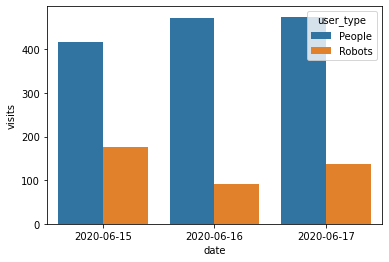

In [73]:
# sns.barplot(x = task1.loc[task1['user_type'] == 'People'].date, y = task1.loc[task1['user_type'] == 'People'].visits)
# sns.barplot(x = task1.loc[task1['user_type'] == 'Robots'].date, y = task1.loc[task1['user_type'] == 'Robots'].visits)

sns.barplot(hue = task1.user_type, x = task1.date, y = task1.visits)

In [74]:
# task 2

task2_init = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_2_lesson_7.csv', sep = ',')

task2 = task2_init.copy()

(task2.loc[task2['browser'] == 'Google Chrome'].visits.sum() / task2.visits.sum() * 100).round(0)



60.0

In [75]:
# task 3

task3_init = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv', sep = ',')

task3 = task3_init.copy()

task3

# (task3.loc[task3['user_type'] == 'Robots'].groupby(['browser']).agg({'visits':'sum'}) / task3.loc[task3['user_type'] == 'Robots'].visits.sum() * 100).sort_values('visits', ascending = False)


date             browser user_type  visits
0   2020-06-15       Google Chrome    People   250.0
1   2020-06-15       Google Chrome    Robots   104.0
2   2020-06-15      Yandex Browser    People    47.0
3   2020-06-15             Firefox    Robots    31.0
4   2020-06-15       Chrome Mobile    People    31.0
5   2020-06-15             Firefox    People    27.0
6   2020-06-15              Safari    Robots    22.0
7   2020-06-15              Safari    People    19.0
8   2020-06-15       Mobile Safari    People    15.0
9   2020-06-15               Opera    People    11.0
10  2020-06-15    Samsung Internet    People     8.0
11  2020-06-15      Yandex Browser    Robots     7.0
12  2020-06-15               Opera    Robots     5.0
13  2020-06-15               UCWEB    Robots     4.0
14  2020-06-15                Edge    People     4.0
15  2020-06-15       Mobile Safari    Robots     1.0
16  2020-06-15     Android Browser    People     1.0
17  2020-06-15            Chromium    People     1.0
18  2020-06-15            Chromium    Robots     1.0
19  2020-06-15  Yandex: mobile app    People     1.0
20  2020-06-15             Vivaldi    People     1.0
21  2020-06-15                Edge    Robots     1.0
22  2020-06-15              CocCoc    People     1.0
23  2020-06-15    Samsung Internet    Robots     1.0

In [76]:
task3_browser_visits = task3.groupby(['browser']).agg({'visits':'sum'}).reset_index()

task3_browser_visits

browser  visits
0      Android Browser     1.0
1        Chrome Mobile    31.0
2             Chromium     2.0
3               CocCoc     1.0
4                 Edge     5.0
5              Firefox    58.0
6        Google Chrome   354.0
7        Mobile Safari    16.0
8                Opera    16.0
9               Safari    41.0
10    Samsung Internet     9.0
11               UCWEB     4.0
12             Vivaldi     1.0
13      Yandex Browser    54.0
14  Yandex: mobile app     1.0

In [77]:
task3_final = task3.loc[task3['user_type'] == 'Robots'].merge(task3_browser_visits, how='inner', on='browser')
task3_final

date           browser user_type  visits_x  visits_y
0  2020-06-15     Google Chrome    Robots     104.0     354.0
1  2020-06-15           Firefox    Robots      31.0      58.0
2  2020-06-15            Safari    Robots      22.0      41.0
3  2020-06-15    Yandex Browser    Robots       7.0      54.0
4  2020-06-15             Opera    Robots       5.0      16.0
5  2020-06-15             UCWEB    Robots       4.0       4.0
6  2020-06-15     Mobile Safari    Robots       1.0      16.0
7  2020-06-15          Chromium    Robots       1.0       2.0
8  2020-06-15              Edge    Robots       1.0       5.0
9  2020-06-15  Samsung Internet    Robots       1.0       9.0

In [78]:
task3_final['ratio'] = task3_final['visits_x'] / task3_final['visits_y']

task3_final.sort_values('ratio',ascending=False)

date           browser user_type  visits_x  visits_y     ratio
5  2020-06-15             UCWEB    Robots       4.0       4.0  1.000000
2  2020-06-15            Safari    Robots      22.0      41.0  0.536585
1  2020-06-15           Firefox    Robots      31.0      58.0  0.534483
7  2020-06-15          Chromium    Robots       1.0       2.0  0.500000
4  2020-06-15             Opera    Robots       5.0      16.0  0.312500
0  2020-06-15     Google Chrome    Robots     104.0     354.0  0.293785
8  2020-06-15              Edge    Robots       1.0       5.0  0.200000
3  2020-06-15    Yandex Browser    Robots       7.0      54.0  0.129630
9  2020-06-15  Samsung Internet    Robots       1.0       9.0  0.111111
6  2020-06-15     Mobile Safari    Robots       1.0      16.0  0.062500

In [79]:
# task 4

task4_init = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv', sep = ',')

task4 = task4_init.copy()

task4



date             browser user_type  visits
0   2020-06-15       Google Chrome    People   250.0
1   2020-06-15       Google Chrome    Robots   104.0
2   2020-06-15      Yandex Browser    People    47.0
3   2020-06-15             Firefox    Robots    31.0
4   2020-06-15       Chrome Mobile    People    31.0
5   2020-06-15             Firefox    People    27.0
6   2020-06-15              Safari    Robots    22.0
7   2020-06-15              Safari    People    19.0
8   2020-06-15       Mobile Safari    People    15.0
9   2020-06-15               Opera    People    11.0
10  2020-06-15    Samsung Internet    People     8.0
11  2020-06-15      Yandex Browser    Robots     7.0
12  2020-06-15               Opera    Robots     5.0
13  2020-06-15               UCWEB    Robots     4.0
14  2020-06-15                Edge    People     4.0
15  2020-06-15       Mobile Safari    Robots     1.0
16  2020-06-15     Android Browser    People     1.0
17  2020-06-15            Chromium    People     1.0
18  2020-06-15            Chromium    Robots     1.0
19  2020-06-15  Yandex: mobile app    People     1.0
20  2020-06-15             Vivaldi    People     1.0
21  2020-06-15                Edge    Robots     1.0
22  2020-06-15              CocCoc    People     1.0
23  2020-06-15    Samsung Internet    Robots     1.0

In [80]:
task4['ratio'] = (task4['visits'] / task4.visits.sum() * 100).round(1)

df4 = task4.loc[(task4['browser'] == 'Safari') & (task4['user_type'] == 'People')]
df4

date browser user_type  visits  ratio
7  2020-06-15  Safari    People    19.0    3.2

In [81]:
# task 6


###
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials


# Specify path to your file with credentials
path_to_credential = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-svechkov-8/Module 2./Module 2. Lesson 7/tasks/api-project-850118253911-fed872691c25.json' 

# Specify name of table in google sheets
table_name = 'task 7'

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credential, scope)

gs = gspread.authorize(credentials)
work_sheet = gs.open(table_name)



# Select 1st sheet
sheet1 = work_sheet.sheet1

# Get data in python lists format
data = sheet1.get_all_values()

# Get header from data
headers = data.pop(0)

# Create df
df = pd.DataFrame(data, columns=headers)
df.head()


###

column1  column2
0  value11  value12
1  value12  value13
2  value13  value14
3  value14  value15
4  value15  value16

In [82]:
# Create empty table
table_name = 'task6_spreadsheet'
table = gs.create(table_name)
sheet = gs.open(table_name).get_worksheet(0)
sheet
# Make it visible to other guys
table.share('studentishka@gmail.com', perm_type='user', role='writer')

In [83]:
# sheet_to_json = sheet\
# .to_json();


# d2g.upload(df4.to_json(), table_name, sheet_to_json, credentials=credentials, row_names=True)
d2g.upload(df4, table_name, 'Sheet1', credentials=credentials, row_names=True)

<Worksheet 'Sheet1' id:0>

In [84]:

spreadsheet_url = "https://docs.google.com/spreadsheets/d/%s" % table.id



In [85]:
spreadsheet_url

'https://docs.google.com/spreadsheets/d/1Eg_n2ud_2utv-rxSnTVZmBBs2Sx1ErVHSZK4zuv7ToY'

In [86]:
import vk_api

# Token which you obtained via vk
app_token = 'vk1.a.mzfTfPjh1R6I1LMJozglmAfedeGJ1Z6O_2_3qfQ7BUyDyzfwn7_VUvcDbg5Ty7BUv5HAkkTNEFwVMiOvnTceaTDh34pn3qm1BLZ5pu13_UeX8a-f8CeoipDUtH7pMDQ0d3HdrK33Lhu4orniaWYNW2trbJqYfJm-dcGHM5OsbhRhymS0CjAZJJ4anKnF0pzg'

In [87]:
import random

# id of the 1st chat
chat_id = 1

# id of my user-receiver
my_id = 2992087 

# Initialize session
vk_session = vk_api.VkApi(token=app_token)

# Make it possible to use vk api methods as python methods
vk = vk_session.get_api()


vk.messages.send(
    user_id=my_id,
    random_id=random.randint(1, 2 ** 31),
    message=spreadsheet_url)

6

In [88]:
# task 7

from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content

df = pd.read_csv(BytesIO(data))
df


date             browser user_type  users
0   2020-06-15       Google Chrome    People  240.0
1   2020-06-15       Google Chrome    Robots  104.0
2   2020-06-15      Yandex Browser    People   44.0
3   2020-06-15       Chrome Mobile    People   30.0
4   2020-06-15             Firefox    Robots   29.0
5   2020-06-15             Firefox    People   26.0
6   2020-06-15              Safari    Robots   20.0
7   2020-06-15              Safari    People   17.0
8   2020-06-15       Mobile Safari    People   14.0
9   2020-06-15               Opera    People   10.0
10  2020-06-15    Samsung Internet    People    8.0
11  2020-06-15      Yandex Browser    Robots    7.0
12  2020-06-15               Opera    Robots    5.0
13  2020-06-15               UCWEB    Robots    4.0
14  2020-06-15                Edge    People    4.0
15  2020-06-15       Mobile Safari    Robots    1.0
16  2020-06-15     Android Browser    People    1.0
17  2020-06-15            Chromium    People    1.0
18  2020-06-15            Chromium    Robots    1.0
19  2020-06-15  Yandex: mobile app    People    1.0
20  2020-06-15             Vivaldi    People    1.0
21  2020-06-15                Edge    Robots    1.0
22  2020-06-15              CocCoc    People    1.0
23  2020-06-15    Samsung Internet    Robots    1.0

In [92]:
task4_4_task7 = task4_init.copy()

task7 = task4_4_task7.merge(df, on = ['date','browser','user_type'], how = 'inner')
task7['ratio'] = (task7['users'] / task7['visits']).round(0)
task7

date             browser user_type  visits  users  ratio
0   2020-06-15       Google Chrome    People   250.0  240.0    1.0
1   2020-06-15       Google Chrome    Robots   104.0  104.0    1.0
2   2020-06-15      Yandex Browser    People    47.0   44.0    1.0
3   2020-06-15             Firefox    Robots    31.0   29.0    1.0
4   2020-06-15       Chrome Mobile    People    31.0   30.0    1.0
5   2020-06-15             Firefox    People    27.0   26.0    1.0
6   2020-06-15              Safari    Robots    22.0   20.0    1.0
7   2020-06-15              Safari    People    19.0   17.0    1.0
8   2020-06-15       Mobile Safari    People    15.0   14.0    1.0
9   2020-06-15               Opera    People    11.0   10.0    1.0
10  2020-06-15    Samsung Internet    People     8.0    8.0    1.0
11  2020-06-15      Yandex Browser    Robots     7.0    7.0    1.0
12  2020-06-15               Opera    Robots     5.0    5.0    1.0
13  2020-06-15               UCWEB    Robots     4.0    4.0    1.0
14  2020-06-15                Edge    People     4.0    4.0    1.0
15  2020-06-15       Mobile Safari    Robots     1.0    1.0    1.0
16  2020-06-15     Android Browser    People     1.0    1.0    1.0
17  2020-06-15            Chromium    People     1.0    1.0    1.0
18  2020-06-15            Chromium    Robots     1.0    1.0    1.0
19  2020-06-15  Yandex: mobile app    People     1.0    1.0    1.0
20  2020-06-15             Vivaldi    People     1.0    1.0    1.0
21  2020-06-15                Edge    Robots     1.0    1.0    1.0
22  2020-06-15              CocCoc    People     1.0    1.0    1.0
23  2020-06-15    Samsung Internet    Robots     1.0    1.0    1.0